In [1]:
# Objectives:
# How to use the scikit-learn regression model
# How to train the regressor using the fit() method
# How to predict new labels using the predict() method

In [2]:
# Work through linear regression with the following steps:
# Step 1: Getting and setting up the data.
# Step 2: Visualizing current data.
# Step 3: The mathematics behind the Least Squares Method.
# Step 4: Using Numpy for a Univariate Linear Regression.
# Step 5: Getting the error.
# Step 6: Using scikit learn to implement a multivariate regression.
# Step 7: Using Training and Validation.  
# Step 8: Predicting Prices
# Step 9 : Residual Plots

In [3]:
# Step 1: Getting and setting up the data
# Import tools and data

import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

In [4]:
# Imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Import dataset and linear_model module

from sklearn.datasets import load_boston

In [5]:
# Load the housing dataset
boston = load_boston()

In [6]:
# Check what the data set contains
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

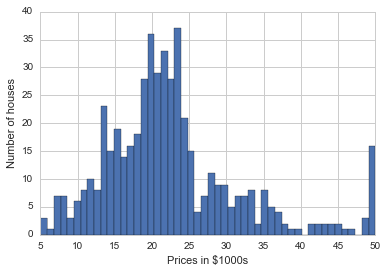

In [9]:
# Step 2: Visualizing current data
# Quick visualization of the data
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

# Add labels
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

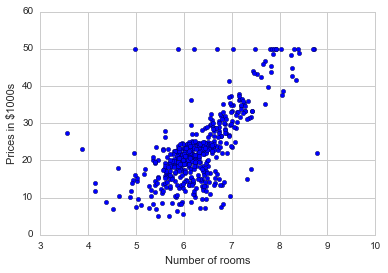

In [12]:
# Scatter plot the housing price versus the number of rooms in the dwelling: positive correlation
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Prices in $1000s')
plt.xlabel('Number of rooms')

In [13]:
# Next steps
# 1) Use pandas to transform the boston dataset into a DataFrame 
# 2) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [14]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
# Add the target of the boston data set
boston_df['Price']= boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


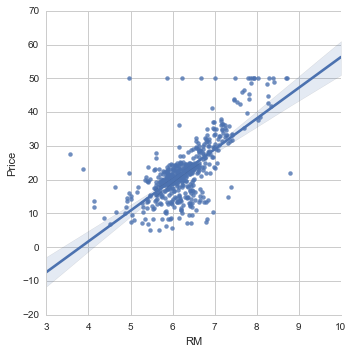

In [17]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data=boston_df)

In [26]:
# Step 3: The mathematics behind the Least Squares Method
# Step 4: Using Numpy for a Univariate Linear Regression

# Set up X as median room values
X= boston_df.RM

# Use v to make X two-dimensional
X= np.vstack(boston_df.RM)
X.shape

(506L, 1L)

In [27]:
# Set up Y as the target price of the houses.
Y= boston_df.Price

In [28]:
# Create the X array in the form [X 1]
X = np.array([[value,1] for value in X])

In [30]:
# Get out m and b values for our best fit line
m,b =np.linalg.lstsq(X,Y)[0]

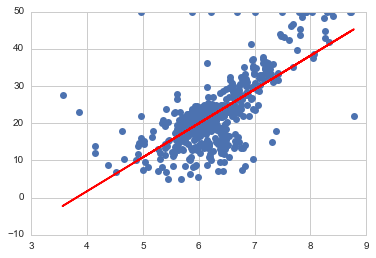

In [31]:
# Plot the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Get the best fit line: 'r' means read line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [33]:
# Step 5: Getting the error
# Get the resulting array
results = np.linalg.lstsq(X,Y)

# Get the total error
error_total = results[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

print 'The root mean square error was %.2f'  %rmse

The root mean square error was 6.60


In [45]:
# Step 6: Using scikit learn to implement a multivariate regression
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [35]:
# Create a LinearRegression Object
lreg =LinearRegression()

In [37]:
# Data columns
X_multi = boston_df.drop('Price',1)

# Target colum
Y_target = boston_df.Price

# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# Check the intercept and number of coefficients
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 36.49 
 The number of coefficients used was 13 


In [41]:
# Set a dataframe from all features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns =['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df['Coefficient Estimate']= Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [48]:
# Step 7: Using Training and Validation for prediction
# Grab the output and set as X and Y test and train data sets
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)


In [49]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((379L, 2L), (127L, 2L), (379L,), (127L,))


In [50]:
# Step 8: Predicting Prices
# Use training set for the prediction and then use testing set for validation

lreg = LinearRegression()
# Linear regression only on the training sets 
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train) 
pred_test = lreg.predict(X_test)


In [52]:
# Get the mean square error
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 43.56
Fit a model X_train, and calculate MSE with X_test and Y_test: 43.99


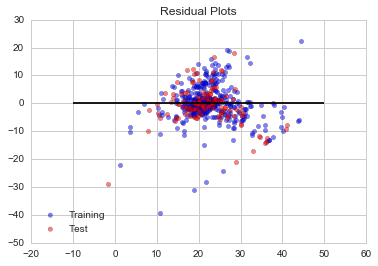

In [56]:
# Step 9 : Residual Plots :check whether randomly scattered around line zero
# Scatter plot the training data
train =plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the test data
test =plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

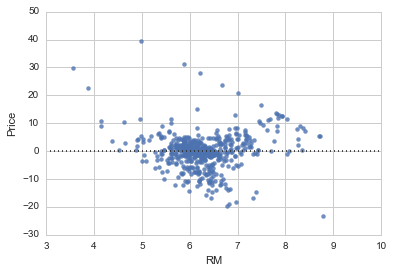

In [57]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)